### Golden Section Search

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import time

PHI = (5**0.5-1)/2

def f(x):
    return (x-20)**4/500 - 2*x
def gss(f, x_init, eps):
    x_lo, x_hi = x_init
    x_1 = x_hi - PHI*(x_hi - x_lo)
    x_2 = x_lo + PHI*(x_hi - x_lo)
    iter = 0
    while (x_hi - x_lo) >= eps:
        if iter % 2 == 0:
            plt.clf()
            visual_f(f, x_lo, x_hi, x_1, x_2, x_init)
            time.sleep(0.5)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            print(f"Iteration {iter}")
        if f(x_1) < f(x_2):
            x_hi = x_2
            x_2 = x_1
            x_1 = x_hi - PHI*(x_hi - x_lo)
        else:
            x_lo = x_1
            x_1 = x_2
            x_2 = x_lo + PHI*(x_hi - x_lo)
        iter += 1
    print(f"Minimum {f((x_lo + x_hi)/2)} achieved at point {(x_lo + x_hi)/2}")
    return (x_lo + x_hi)/2, f((x_lo + x_hi)/2)
def visual_f(f, x_lo, x_hi, x_1, x_2, lims):
    x = np.linspace(x_lo, x_hi)
    plt.plot(x, f(x))
    plt.plot(x_1, 0, marker='$x_1$')
    plt.plot(x_2, 0, marker='$x_2$')
    plt.axhline(0)
    plt.axvline(x_1, linestyle='--')
    plt.axvline(x_2, linestyle='--')
    plt.show()

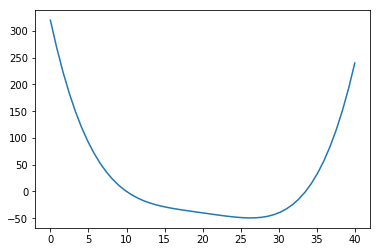

In [61]:
x_init = (0, 40)
x = np.linspace(x_init[0], x_init[1])
plt.plot(x, f(x))

In [71]:
gss(f, (0, 40), 0.1)

<Figure size 432x288 with 0 Axes>

Iteration 12
Minimum -49.449364938353824 achieved at point 26.309095726642475


(26.309095726642475, -49.449364938353824)

<Figure size 432x288 with 0 Axes>

### Three-Point Pattern

In [65]:
def tpp(f, x_init, step):
    x_lo = x_init
    if f(x_lo+step) < f(x_lo):
        x_mid = x_lo + step
        step *= 2
        while f(x_mid) >= f(x_mid+step):
            x_lo = x_mid
            x_mid = x_mid + step
            step *= 2
        x_hi = x_mid + step
    else:
        x_hi = x_lo + step
        step /= 2
        while f(x_lo + step) >= f(x_lo):
            x_hi = x_lo + step
            step /= 2
        x_mid = x_lo + step
    return (x_lo, x_mid, x_hi)

### Quadratic Fit Search

In [75]:
def right(f, x_lo, x_mid, x_hi, x_qu):
    if f(x_qu)>f(x_mid):
        return x_lo, x_mid, x_qu
    return x_mid, x_qu, x_hi

def left(f, x_lo, x_mid, x_hi, x_qu):
    if f(x_qu)>f(x_mid):
        return x_qu, x_mid, x_hi
    return x_lo, x_qu, x_mid

def qfs(f, x_init, eps):
    iter = 0
    x_lo, x_mid, x_hi = x_init
    while (x_hi - x_lo)>=eps:
        f_lo = f(x_lo)
        f_mid = f(x_mid)
        f_hi = f(x_hi)
        s_lo = x_lo**2
        s_mid = x_mid**2
        s_hi = x_hi**2
        x_qu = 0.5*(f_lo*(s_mid-s_hi) + f_mid*(s_hi-s_lo) + f_hi*(s_lo-s_mid))/\
               (f_lo*(x_mid-x_hi) + f_mid*(x_hi-x_lo) + f_hi*(x_lo-x_mid))
        if x_qu == x_mid:
            if (x_mid - x_lo) < (x_hi - x_mid):
                x_qu = x_mid + 0.5*eps
                x_lo, x_mid, x_hi = right(f, x_lo, x_mid, x_hi, x_qu)
            else:
                x_qu = x_mid - 0.5*eps
                x_lo, x_mid, x_hi = left(f, x_lo, x_mid, x_hi, x_qu)
        elif x_qu < x_mid:
            x_lo, x_mid, x_hi = left(f, x_lo, x_mid, x_hi, x_qu)
        else:
            x_lo, x_mid, x_hi = right(f, x_lo, x_mid, x_hi, x_qu)
        iter += 1
    print(f"At iteration {iter}, found {x_mid} with value {f(x_mid)}")
    return x_mid, f(x_mid)